In [ ]:
from utils.utils import *
import os
import torch
import numpy as np
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms, utils

import matplotlib
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [16, 9]

%load_ext autoreload
%autoreload 2

# Predictions Grid

In [37]:
src_model_path = '/nfs/students/mirlas/predictions/seg/resnet50_fcn_400x800_IN_ce_gamma0.0e+00_lr2.5e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/'
gt_prefix = 'tar_gt_'
pred_prefix = 'tar_pred_'
inp_prefix = 'tar_inp_'

images = [
    'frankfurt_000000_019607_leftImg8bit.png',
#     'frankfurt_000000_020880_leftImg8bit.png',
#     'frankfurt_000001_023769_leftImg8bit.png',
    'frankfurt_000001_010444_leftImg8bit.png',
    'frankfurt_000001_064798_leftImg8bit.png',
    'frankfurt_000001_072295_leftImg8bit.png',
    'frankfurt_000001_065160_leftImg8bit.png'
]

models_da_comparison = [
    '/nfs/students/mirlas/predictions/seg/resnet50_fcn_400x800_IN_ce_gamma0.0e+00_lr2.5e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/',
    '/nfs/students/mirlas/predictions/seg_da/resnet50_fcn_400x800_IN_ce_output_gamma0.0e+00_lmbdda1.0e-03_lr2.5e-04_lrda1.0e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/',
    '/nfs/students/mirlas/predictions/seg_pretr_da/resnet50_fcn_400x800_IN_ce_output_gamma0.0e+00_lmbdda2.0e-04_lr2.5e-04_lrda1.0e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/'
]

models_da_pretext_comparison = [
    '/nfs/students/mirlas/predictions/seg/resnet50_fcn_400x800_IN_ce_gamma0.0e+00_lr2.5e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/',
    '/nfs/students/mirlas/predictions/seg_pretr_da/resnet50_fcn_400x800_IN_ce_output_gamma0.0e+00_lmbdda2.0e-04_lr2.5e-04_lrda1.0e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/',
    '/nfs/students/mirlas/predictions/seg_pretr_rot/resnet50_fcn_400x800_crop400_IN_ce_output_gamma0.0e+00_lmbdaux5.0e-02_lr2.5e-04_lraux1.0e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/',
    '/nfs/students/mirlas/predictions/seg_pretr_jigsaw/resnet50_fcn_400x800_grid1x2_IN_ce_output_gamma0.0e+00_lmbdaux5.0e-03_lr2.5e-04_lraux1.0e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/',
    '/nfs/students/mirlas/predictions/seg_pretr_pirl2/resnet50_fcn_400x800_grid1x2_IN_ce_output_t7.5e-01_proj256_mbsize128_mbbatch128_gamma0.0e+00_lmbdaux5.0e-03_lr2.5e-04_lraux1.0e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/'
]

models_da_pretextda_comparison = [
    '/nfs/students/mirlas/predictions/seg/resnet50_fcn_400x800_IN_ce_gamma0.0e+00_lr2.5e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/',
    '/nfs/students/mirlas/predictions/seg_pretr_da/resnet50_fcn_400x800_IN_ce_output_gamma0.0e+00_lmbdda2.0e-04_lr2.5e-04_lrda1.0e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/',
    '/nfs/students/mirlas/predictions/seg_pretr_rot_da/resnet50_fcn_400x800_crop400_IN_ce_out_out_gamma0.0e+00_lmbdaux5.0e-01_lmbdda2.0e-04_lr2.5e-04_lraux1.0e-04_lrda1.0e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/',
    '/nfs/students/mirlas/predictions/seg_pretr_jigsaw_da/resnet50_fcn_400x800_grid1x2_IN_ce_fea_out_gamma0.0e+00_lmbdaux5.0e-02_lmbdda2.0e-04_lr2.5e-04_lraux1.0e-04_lrda1.0e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/',
    '/nfs/students/mirlas/predictions/seg_pretr_pirl2_da/resnet50_fcn_400x800_grid1x2_IN_ce_out_fea_t7.5e-01_proj256_mbsize128_mbbatch128_gamma0.0e+00_lmbdaux5.0e-03_lmbdda2.0e-04_lr2.5e-04_lraux1.0e-04_lrda1.0e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/'
]

In [38]:
def compile_grid(images, models_comparison, scale_factor):
    tensors = []
    to_tensor = transforms.ToTensor()
    for image_name in images:
        tensors.append(Image.open(os.path.join(src_model_path, inp_prefix+image_name)))
    for image_name in images:
        tensors.append(Image.open(os.path.join(src_model_path, gt_prefix+image_name)))
    for model_path in models_comparison:
        for image_name in images:
            tensors.append(Image.open(os.path.join(model_path, pred_prefix+image_name)))
    tensors = [to_tensor(x) for x in tensors]
    grid = make_grid(tensor=tensors, nrow=len(images), padding=3)
    grid = torch.nn.functional.interpolate(grid.unsqueeze(0), scale_factor=0.5)
    grid.squeeze_()
    return grid
    

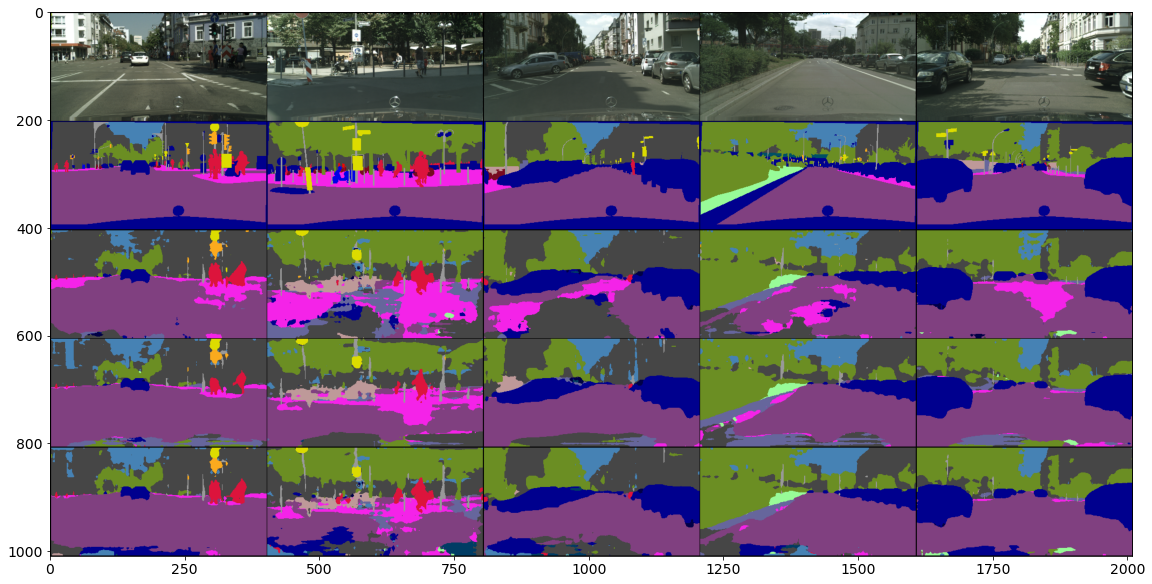

In [39]:
grid = compile_grid(images, models_da_comparison, 0.25)
utils.save_image(grid, '/nfs/students/mirlas/vizualizations/figures/ssda_models_da_comparison{}.png'.format(len(images)))
plt.imshow(grid.permute(1, 2, 0))

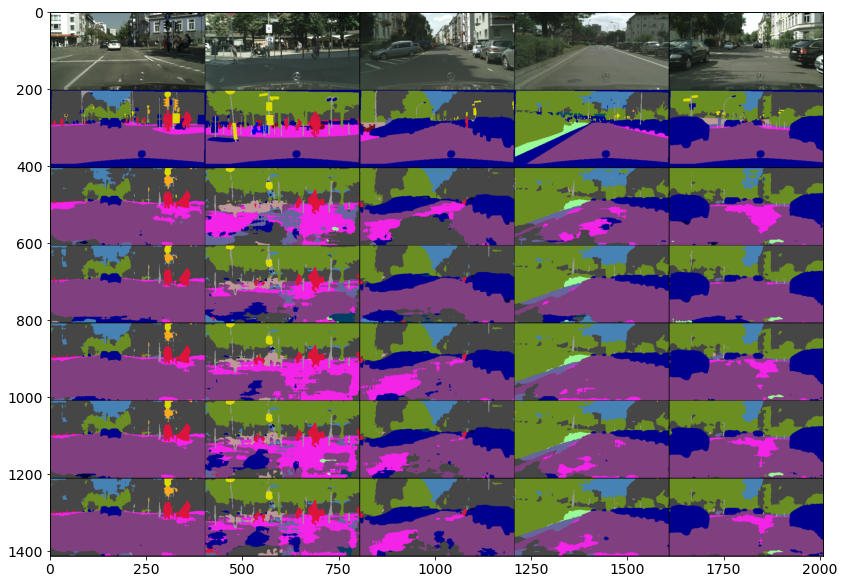

In [40]:
grid = compile_grid(images, models_da_pretext_comparison, 0.25)
utils.save_image(grid, '/nfs/students/mirlas/vizualizations/figures/ssda_models_da_pretext_comparison{}.png'.format(len(images)))
plt.imshow(grid.permute(1, 2, 0))

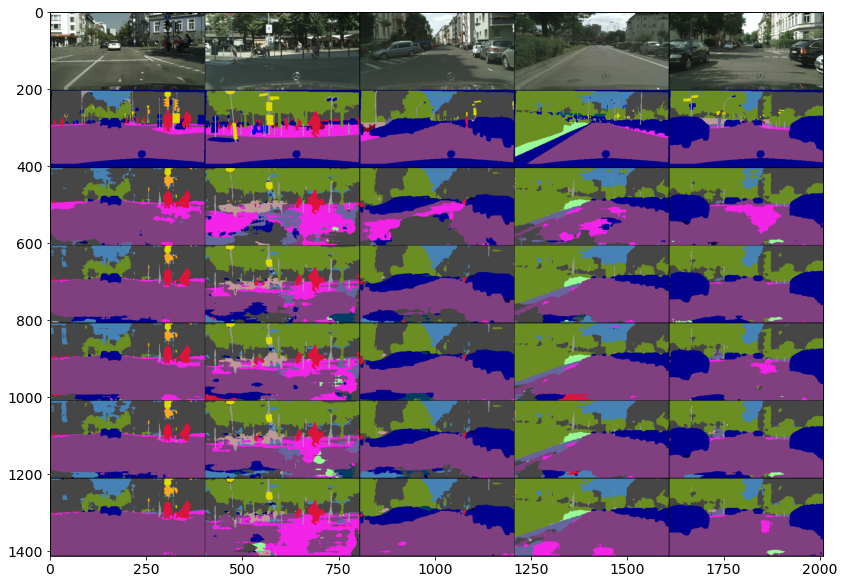

In [41]:
grid = compile_grid(images, models_da_pretextda_comparison, 0.25)
utils.save_image(grid, '/nfs/students/mirlas/vizualizations/figures/ssda_models_da_pretextda_comparison{}.png'.format(len(images)))
plt.imshow(grid.permute(1, 2, 0))

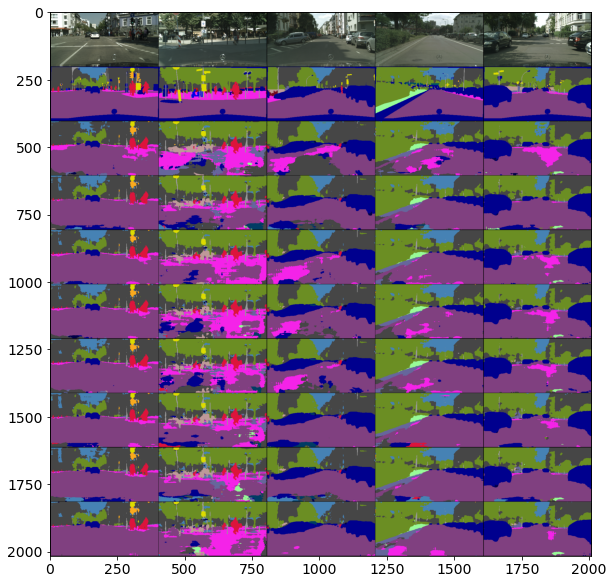

In [42]:
grid = compile_grid(images, models_da_pretext_comparison+models_da_pretextda_comparison[-3:], 0.25)
utils.save_image(grid, '/nfs/students/mirlas/vizualizations/figures/ssda_models_all_comparison{}.png'.format(len(images)))
plt.imshow(grid.permute(1, 2, 0))

# T-SNE

In [5]:
from datasets.datasets import SegmentationDataSet, RotationDataSet, JigsawDataSet
from datasets.data_constants import *

import torch
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import models

from sklearn.manifold import TSNE

In [3]:
# data params
source_dir = '/nfs/students/mirlas/data/'
target_dir = '/nfs/students/mirlas/data/'
source_train_images = 'gta5_images_train.txt'
source_train_labels = 'gta5_labels_train.txt'
source_val_images = 'gta5_images_val.txt'
source_val_labels = 'gta5_labels_val.txt'
target_val_images = 'cityscapes_images_val.txt'
target_val_labels = 'cityscapes_labels_val.txt'

train_batch_size = 2
val_batch_size = 2
image_height = 400
image_width = 800
num_workers = 4
seed=42

# network params
backbone = 'resnet50'
classification_head = 'fcn'
pretrained_backbone = True

batches_to_visualize = 100
pts_to_sample = 250

#  initialize the global parameters
cuda_status = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda_status else "cpu")
image_size = (image_height, image_width)
start_epoch = 0
if seed > 0:
    torch.manual_seed(seed)

In [4]:
load_checkpoints = [
    '/nfs/students/mirlas/snapshots/seg/resnet50_fcn_400x800_IN_ce_gamma0.0e+00_lr2.5e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/checkpoint_20.pth',
    '/nfs/students/mirlas/snapshots/seg_pretr_rot_da/resnet50_fcn_400x800_crop400_IN_ce_out_out_gamma0.0e+00_lmbdaux5.0e-01_lmbdda2.0e-04_lr2.5e-04_lraux1.0e-04_lrda1.0e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/checkpoint_20.pth',
]

# network params
backbone = 'resnet50'
classification_head = 'fcn'
pretrained_backbone = True

In [5]:
#  initialize the datasets
source_train_dataset = SegmentationDataSet(root=source_dir, image_list_name=source_train_images, 
                                           label_list_name=source_train_labels, size=image_size, 
                                           mean=GTA5_MEAN, std=GTA5_STD, label2train=GTA5_LABELS2TRAIN)
source_val_dataset = SegmentationDataSet(root=target_dir, image_list_name=source_val_images, 
                                         label_list_name=source_val_labels, size=image_size, 
                                         mean=GTA5_MEAN, std=GTA5_STD, label2train=GTA5_LABELS2TRAIN)
target_val_dataset = SegmentationDataSet(root=target_dir, image_list_name=target_val_images, 
                                         label_list_name=target_val_labels, size=image_size, 
                                         mean=CITYSCAPES_MEAN, std=CITYSCAPES_STD, label2train=CITYSCAPES_LABELS2TRAIN)

In [6]:
#  initialize the model
#  segmentation model
seg_model_name =  classification_head + '_' + backbone
seg_model_loader = getattr(models.segmentation, seg_model_name)
seg_model = seg_model_loader(pretrained=False, 
                num_classes=NUM_CLASSES,
                progress=False,
                aux_loss=False,
                pretrained_backbone=pretrained_backbone)

In [7]:
perplexity = 45
learning_rate = 20
n_iter = 1000

tsne = TSNE(perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, verbose=1, random_state=seed)

## WITHOUT DOMAIN ADAPTATION

In [8]:
#  reinitialize if nesseccary
if os.path.isfile(load_checkpoints[0]):
    checkpoint = torch.load(load_checkpoints[0])
    if 'seg_model' in checkpoint:
        seg_model.load_state_dict(checkpoint['seg_model'])

seg_model.to(device)

seg_model.eval()
if seed > 0:
        set_seed(seed)

with torch.no_grad():
    src_features, src_labels = sample_features(source_val_dataset, seg_model, 
                                   device, batches_to_visualize*val_batch_size, 
                                   pts_to_sample, level='out')
    tar_features, tar_labels = sample_features(target_val_dataset, seg_model,
                                   device, batches_to_visualize*val_batch_size, 
                                   pts_to_sample, level='out')

dataset_label = ['src']*len(src_labels) + ['tar']*len(tar_labels)
gt_label = src_labels + tar_labels
classes, cnts = np.unique(gt_label, return_counts=True)
classes_cnt = dict(zip(classes, cnts))

idxs = [True if gt_label[i] != 255 and classes_cnt[c] >= 500 else False for i, c in enumerate(gt_label)]
dataset_cmap = ['r' if x=='src' else 'b' for i, x in enumerate(dataset_label) if idxs[i]]
gt_label_filtered = [x for i, x in enumerate(gt_label) if idxs[i]]

all_features = torch.cat([src_features, tar_features], dim=0)[idxs]
tsne_features_new_withoutda = tsne.fit_transform(all_features)

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 86017 samples in 0.241s...
[t-SNE] Computed neighbors for 86017 samples in 74.986s...
[t-SNE] Computed conditional probabilities for sample 1000 / 86017
[t-SNE] Computed conditional probabilities for sample 2000 / 86017
[t-SNE] Computed conditional probabilities for sample 3000 / 86017
[t-SNE] Computed conditional probabilities for sample 4000 / 86017
[t-SNE] Computed conditional probabilities for sample 5000 / 86017
[t-SNE] Computed conditional probabilities for sample 6000 / 86017
[t-SNE] Computed conditional probabilities for sample 7000 / 86017
[t-SNE] Computed conditional probabilities for sample 8000 / 86017
[t-SNE] Computed conditional probabilities for sample 9000 / 86017
[t-SNE] Computed conditional probabilities for sample 10000 / 86017
[t-SNE] Computed conditional probabilities for sample 11000 / 86017
[t-SNE] Computed conditional probabilities for sample 12000 / 86017
[t-SNE] Computed conditional probabilities for s

## WITH DOMAIN ADAPTATION

In [9]:
#  reinitialize if nesseccary
if os.path.isfile(load_checkpoints[1]):
    checkpoint = torch.load(load_checkpoints[1])
    if 'seg_model' in checkpoint:
        seg_model.load_state_dict(checkpoint['seg_model'])

seg_model.to(device)

seg_model.eval()
if seed > 0:
        set_seed(seed)

with torch.no_grad():
    src_features, src_labels = sample_features(source_val_dataset, seg_model, 
                                   device, batches_to_visualize*val_batch_size, 
                                   pts_to_sample, level='out')
    tar_features, tar_labels = sample_features(target_val_dataset, seg_model,
                                   device, batches_to_visualize*val_batch_size, 
                                   pts_to_sample, level='out')

dataset_label = ['src']*len(src_labels) + ['tar']*len(tar_labels)
gt_label = src_labels + tar_labels
classes, cnts = np.unique(gt_label, return_counts=True)
classes_cnt = dict(zip(classes, cnts))

idxs = [True if gt_label[i] != 255 and classes_cnt[c] >= 500 else False for i, c in enumerate(gt_label)]
dataset_cmap = ['r' if x=='src' else 'b' for i, x in enumerate(dataset_label) if idxs[i]]
gt_label_filtered = [x for i, x in enumerate(gt_label) if idxs[i]]

all_features = torch.cat([src_features, tar_features], dim=0)[idxs]
tsne_features_new_withda = tsne.fit_transform(all_features)

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 86017 samples in 0.245s...
[t-SNE] Computed neighbors for 86017 samples in 70.397s...
[t-SNE] Computed conditional probabilities for sample 1000 / 86017
[t-SNE] Computed conditional probabilities for sample 2000 / 86017
[t-SNE] Computed conditional probabilities for sample 3000 / 86017
[t-SNE] Computed conditional probabilities for sample 4000 / 86017
[t-SNE] Computed conditional probabilities for sample 5000 / 86017
[t-SNE] Computed conditional probabilities for sample 6000 / 86017
[t-SNE] Computed conditional probabilities for sample 7000 / 86017
[t-SNE] Computed conditional probabilities for sample 8000 / 86017
[t-SNE] Computed conditional probabilities for sample 9000 / 86017
[t-SNE] Computed conditional probabilities for sample 10000 / 86017
[t-SNE] Computed conditional probabilities for sample 11000 / 86017
[t-SNE] Computed conditional probabilities for sample 12000 / 86017
[t-SNE] Computed conditional probabilities for s

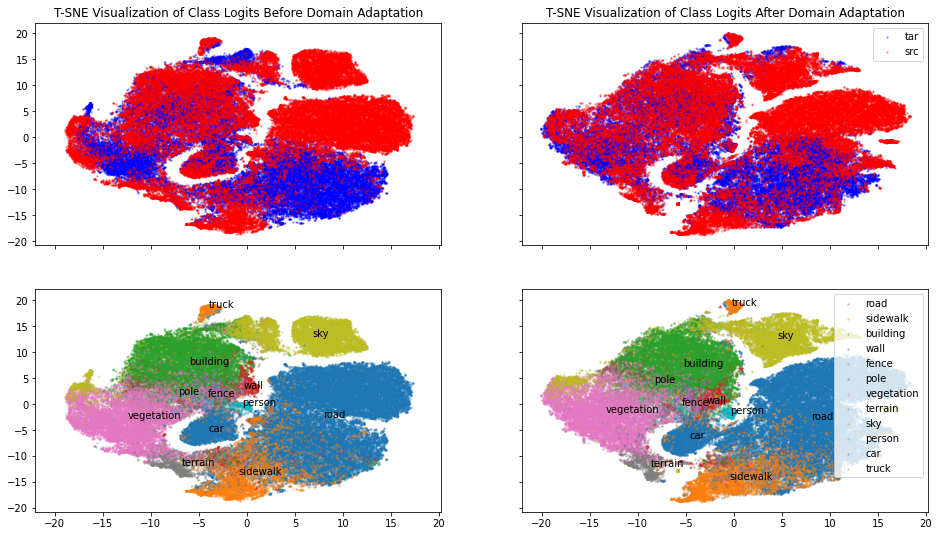

In [14]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
domain_scatters = []
class_scatters = []
features = [tsne_features_new_withoutda, tsne_features_new_withda]
for i in range(2):
    for d in np.unique(dataset_cmap):
        ix = np.where(np.array(dataset_cmap) == d)
        ax[0][i].scatter(features[i][ix, 0], features[i][ix, 1], 
                         label='src' if d=='r' else 'tar', c=d, s=2, alpha=0.3)
    for c in np.unique(gt_label_filtered):
        ix = np.where(np.array(gt_label_filtered) == c)
        ax[1][i].scatter(features[i][ix, 0], features[i][ix, 1], 
                         label=CLASSES[c], s=2, alpha=0.3)
        mean = np.median(features[i][ix], axis=0)
        ax[1][i].text(mean[0], mean[1], CLASSES[c])
ax[1][1].legend(loc='upper right')
ax[0][1].legend(loc='upper right')
ax[0][0].set_title(r'T-SNE Visualization of Class Logits Before Domain Adaptation')
ax[0][1].set_title(r'T-SNE Visualization of Class Logits After Domain Adaptation')
# fig.suptitle(r'T-SNE Visualization of the Rot. + Adv. Model Class Logits', verticalalignment='bottom')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_tsne.png', dpi=72, bbox_inches = 'tight')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_tsne.pdf', dpi=72, bbox_inches = 'tight')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_tsne.svg', dpi=72, bbox_inches = 'tight', format='svg')

# LOCAL PERFORMANCE FOR DIFFERENT PRETEXT TASKS

In [2]:
from datasets.datasets import SegmentationDataSet, RotationDataSet, JigsawDataSet, PIRLDataSet2
from datasets.data_constants import *
from models.classifier import FCClassifier, FCClassifierBatchNorm

import torch
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import models, transforms

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# data params
source_dir = '/nfs/students/mirlas/data/'
target_dir = '/nfs/students/mirlas/data/'
source_train_images = 'gta5_images_train.txt'
source_train_labels = 'gta5_labels_train.txt'
source_val_images = 'gta5_images_val.txt'
source_val_labels = 'gta5_labels_val.txt'
target_val_images = 'cityscapes_images_val.txt'
target_val_labels = 'cityscapes_labels_val.txt'

train_batch_size = 2
val_batch_size = 2
image_height = 400
image_width = 800
num_workers = 4
seed=42

# network params
backbone = 'resnet50'
classification_head = 'fcn'
pretrained_backbone = True

plt.rcParams['font.size'] = 18

#  initialize the global parameters
cuda_status = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda_status else "cpu")
image_size = (image_height, image_width)
start_epoch = 0
if seed > 0:
    torch.manual_seed(seed)

# ROT

In [4]:
load_checkpoints = [
    '/nfs/students/mirlas/snapshots/seg_pretr_rot/resnet50_fcn_400x800_crop128_IN_ce_output_gamma0.0e+00_lmbdaux5.0e-03_lr2.5e-04_lraux1.0e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/checkpoint_20.pth',
    '/nfs/students/mirlas/snapshots/seg_pretr_rot/resnet50_fcn_400x800_crop256_IN_ce_output_gamma0.0e+00_lmbdaux5.0e-02_lr2.5e-04_lraux1.0e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/checkpoint_20.pth',
    '/nfs/students/mirlas/snapshots/seg_pretr_rot/resnet50_fcn_400x800_crop400_IN_ce_output_gamma0.0e+00_lmbdaux5.0e-02_lr2.5e-04_lraux1.0e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/checkpoint_20.pth'
]

size_crop = [
    128, 
    256, 
    400
]

num_iter = 2000

# CLASSES_TO_ADD = [0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 13, 14]
CLASSES_TO_ADD = [0, 1, 2]

In [5]:
#  initialize the model
#  segmentation model
seg_model_name =  classification_head + '_' + backbone
seg_model_loader = getattr(models.segmentation, seg_model_name)
seg_model = seg_model_loader(pretrained=False, 
                num_classes=NUM_CLASSES,
                progress=False,
                aux_loss=False,
                pretrained_backbone=pretrained_backbone)

#  rotation classifier
classifier_config = {
    'input_dim': NUM_CLASSES,
    'ndf': 64
}
classifier_config['num_classes'] = 4
classifier_config['avg_pool'] = True
classifier_config['avg_pool_size'] = 1
aux_model = FCClassifierBatchNorm(**classifier_config)

['munster_000050_000019_leftImg8bit.png', 'frankfurt_000001_083199_leftImg8bit.png']
['munster_000050_000019_leftImg8bit.png', 'frankfurt_000001_083199_leftImg8bit.png']
['munster_000050_000019_leftImg8bit.png', 'frankfurt_000001_083199_leftImg8bit.png']


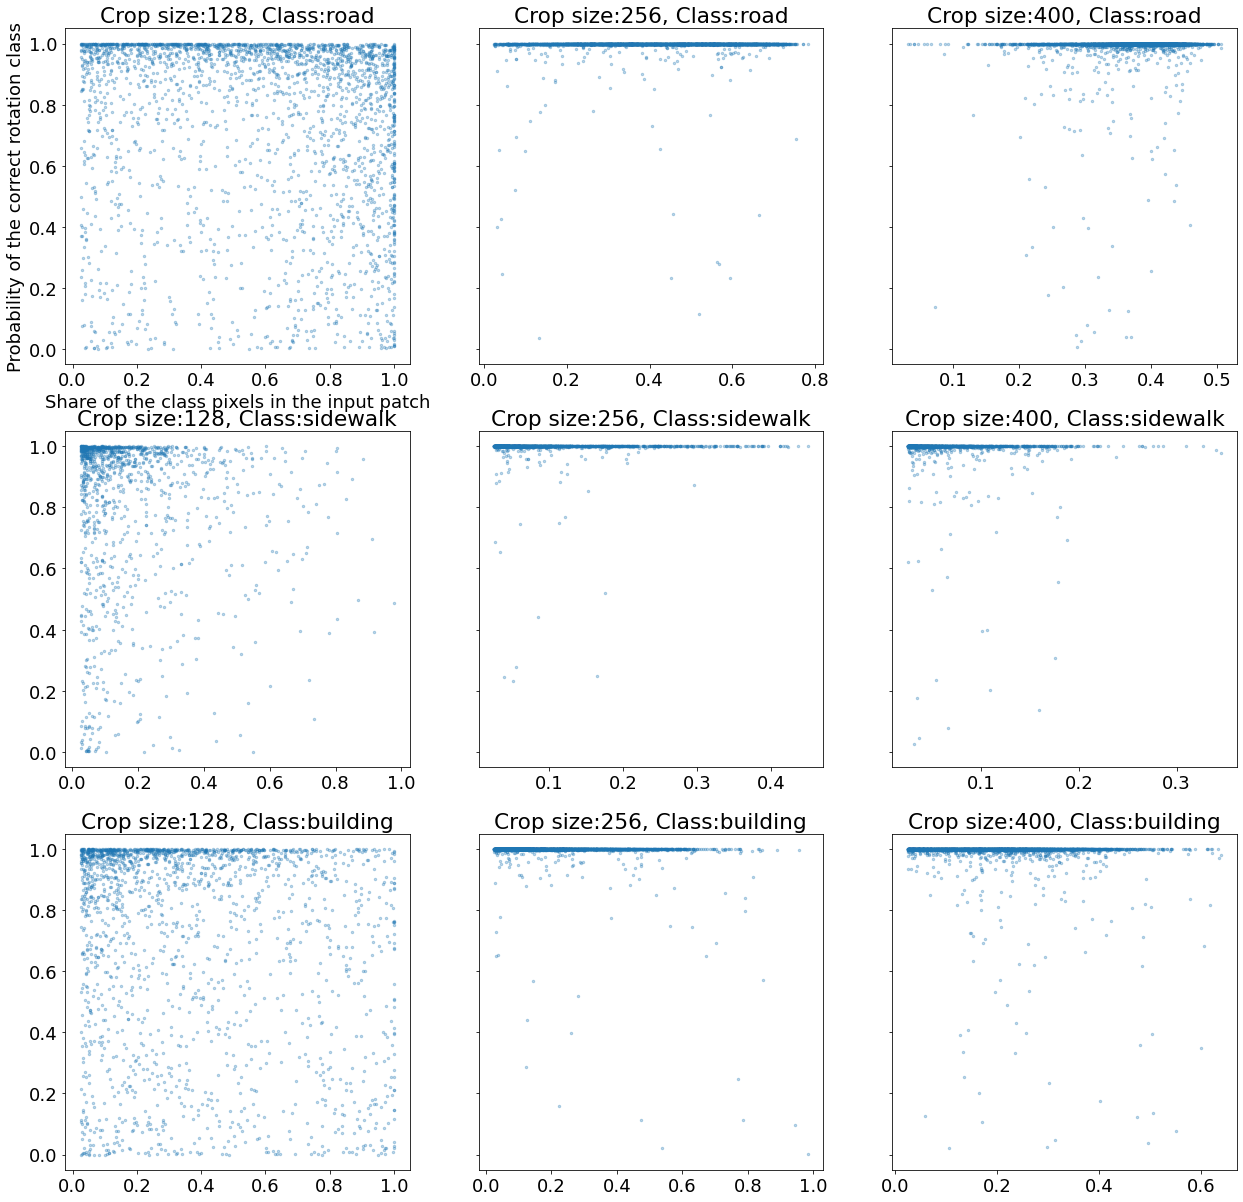

In [6]:
plt.rcParams['figure.figsize'] = [7*len(load_checkpoints), 7*len(CLASSES_TO_ADD)]

fig, ax = plt.subplots(len(CLASSES_TO_ADD), len(load_checkpoints), sharey=True)

for experiment in range(len(load_checkpoints)):
    
    if seed > 0:
            set_seed(seed)
            
    #  reinitialize if nesseccary
    if os.path.isfile(load_checkpoints[experiment]):
        checkpoint = torch.load(load_checkpoints[experiment])
        if 'seg_model' in checkpoint:
            seg_model.load_state_dict(checkpoint['seg_model'])
        if 'aux_model' in checkpoint:
            aux_model.load_state_dict(checkpoint['aux_model'])
            
    seg_model.to(device)
    aux_model.to(device)
    
    seg_model.eval()
    aux_model.eval()
        
    #  initialize the datasets
    target_val_dataset = RotationDataSet(root=target_dir, image_list_name=target_val_images, 
                                     label_list_name=target_val_labels, size=image_size, size_crop=size_crop[experiment],
                                     mean=CITYSCAPES_MEAN, std=CITYSCAPES_STD, label2train=CITYSCAPES_LABELS2TRAIN) 
    target_val_dataloader = DataLoader(target_val_dataset, batch_size=val_batch_size, 
                            shuffle=True, pin_memory=cuda_status, drop_last=True, num_workers=num_workers)
    inf_target_val_dataloader = inf_iter(target_val_dataloader)
    
    predictions = []
    gt = []
    aux_labels = []
        
    for i in range(num_iter):
        _, data = next(inf_target_val_dataloader)
        if i == 0: 
            print(data['name'])
        #  forward pass TARGET image
        #  load target data
        with torch.no_grad():
            aux_image, aux_label, aux_gt = data['aux_image'], data['aux_label'], data['aux_gt']
            aux_image = aux_image.to(device)

            #  forward pass encoder + segmentation
            features = seg_model.backbone(aux_image)
            output = seg_model.classifier(features['out'])
            output = F.interpolate(output, aux_image.shape[-2:], 
                        mode='bilinear', align_corners=False)
            aux_output = aux_model(output).squeeze().cpu()
        gt.append(aux_gt)
        predictions.append(aux_output)
        aux_labels.append(aux_label)
        
    predictions = torch.nn.functional.softmax(torch.stack(predictions), dim=-1).view(-1, 4)
    gt = torch.stack(gt).view(-1)
    predictions = predictions[torch.arange(len(gt)), gt]
    aux_labels = torch.stack(aux_labels).view(-1, size_crop[experiment], size_crop[experiment])
    aux_labels = torch.stack([torch.sum(aux_labels == c, dim=(1, 2)) for c in CLASSES_TO_ADD], 
                             dim=-1)
    aux_labels = aux_labels / float(size_crop[experiment]**2)
    
    for i in range(len(CLASSES_TO_ADD)):
        if i == 0 and experiment == 0:
            ax[i][experiment].set_xlabel(r'Share of the class pixels in the input patch')
            ax[i][experiment].set_ylabel(r'Probability of the correct rotation class')
        ax[i][experiment].scatter(aux_labels[aux_labels[:, i] >= 0.025, i], 
                                  predictions[aux_labels[:, i] >= 0.025], 
                                  s=6, alpha=0.3)
        ax[i][experiment].set_title(r'Crop size:' + str(size_crop[experiment]) + r', Class:' + CLASSES[CLASSES_TO_ADD[i]])

# fig.suptitle(r'Self-Supervised Task Accuracy vs Share of Semantic Class')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_rot_ratio_perf{}.png'.format(str(len(CLASSES_TO_ADD))), bbox_inches = 'tight')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_rot_ratio_perf{}.pdf'.format(str(len(CLASSES_TO_ADD))), bbox_inches = 'tight')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_rot_ratio_perf{}.svg'.format(str(len(CLASSES_TO_ADD))), format='svg', bbox_inches = 'tight')
plt.show()

# JIGSAW

In [7]:
load_checkpoints = [
    '/nfs/students/mirlas/snapshots/seg_pretr_jigsaw/resnet50_fcn_400x800_grid4x8_IN_ce_output_gamma0.0e+00_lmbdaux5.0e-03_lr2.5e-04_lraux1.0e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/checkpoint_20.pth',
    '/nfs/students/mirlas/snapshots/seg_pretr_jigsaw/resnet50_fcn_400x800_grid2x4_IN_ce_output_gamma0.0e+00_lmbdaux5.0e-03_lr2.5e-04_lraux1.0e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/checkpoint_20.pth',
    '/nfs/students/mirlas/snapshots/seg_pretr_jigsaw/resnet50_fcn_400x800_grid1x2_IN_ce_output_gamma0.0e+00_lmbdaux5.0e-03_lr2.5e-04_lraux1.0e-04_m9.0e-01_wd5.0e-04_lrsp9.0e-01/checkpoint_20.pth'
]

grid_size = [
    [4, 8], 
    [2, 4], 
    [1, 2]
]

num_iter = 500

# CLASSES_TO_ADD = [0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 13, 14]
CLASSES_TO_ADD = [0, 1, 2]

In [8]:
#  initialize the model
#  segmentation model
seg_model_name =  classification_head + '_' + backbone
seg_model_loader = getattr(models.segmentation, seg_model_name)
seg_model = seg_model_loader(pretrained=False, 
                num_classes=NUM_CLASSES,
                progress=False,
                aux_loss=False,
                pretrained_backbone=pretrained_backbone)

['munster_000073_000019_leftImg8bit.png', 'lindau_000003_000019_leftImg8bit.png']
['munster_000105_000019_leftImg8bit.png', 'munster_000085_000019_leftImg8bit.png']
['munster_000127_000019_leftImg8bit.png', 'lindau_000054_000019_leftImg8bit.png']


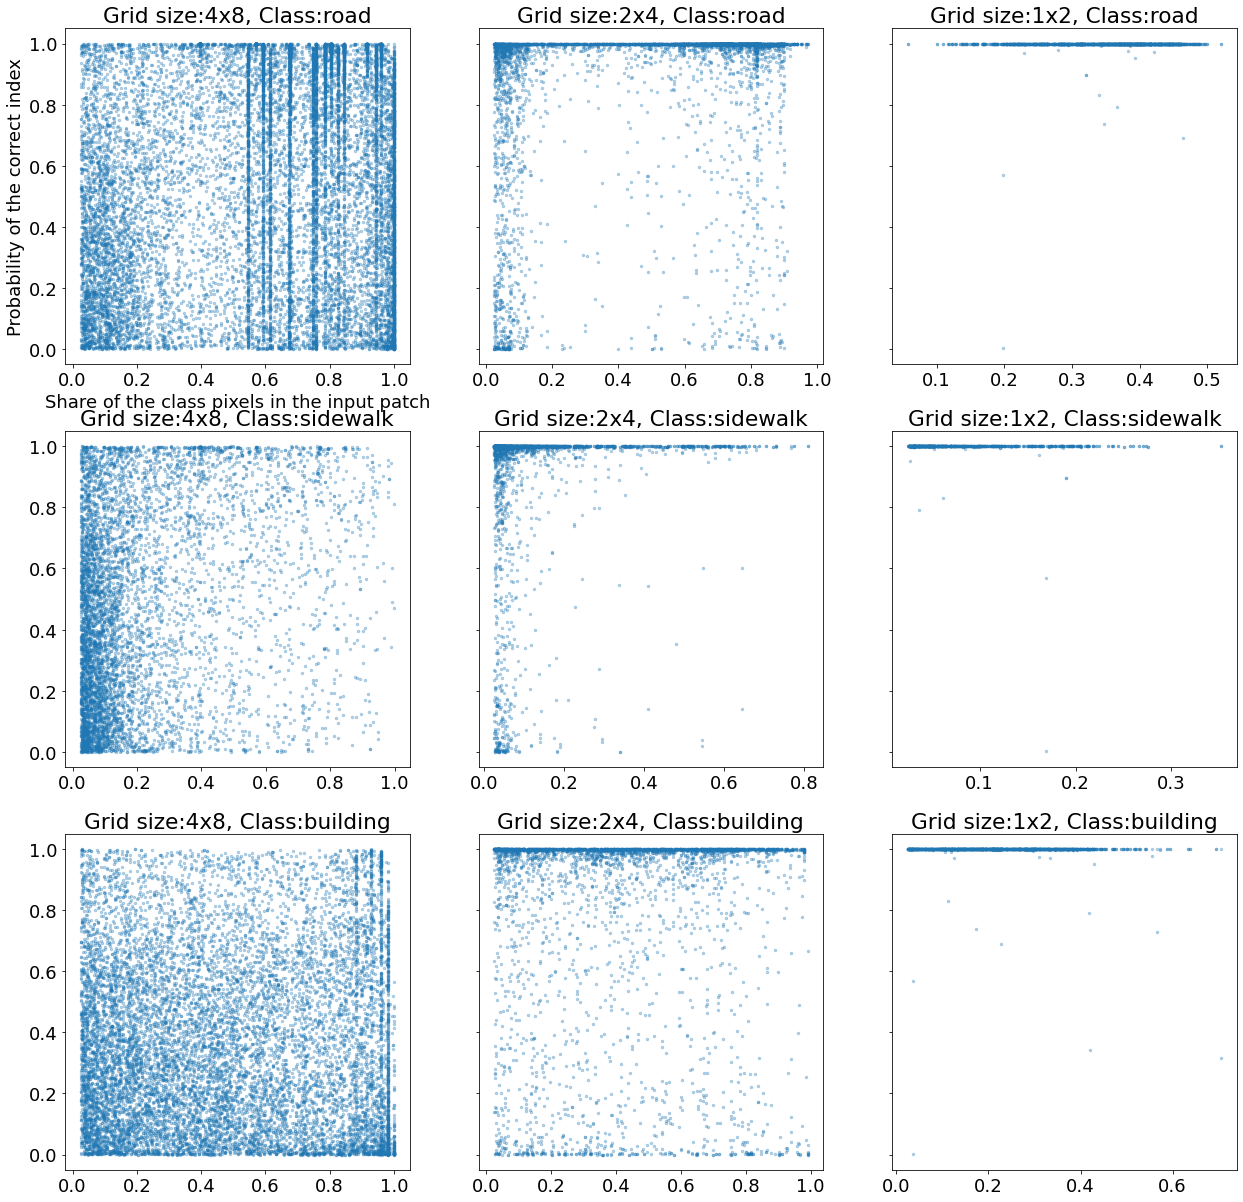

In [9]:
plt.rcParams['figure.figsize'] = [7*len(load_checkpoints), 7*len(CLASSES_TO_ADD)]

fig, ax = plt.subplots(len(CLASSES_TO_ADD), len(load_checkpoints), sharey=True)

for experiment in range(len(load_checkpoints)):
    
    if seed > 0:
            set_seed(seed)
            
    #  rotation classifier
    classifier_config = {
        'input_dim': NUM_CLASSES,
        'ndf': 64
    }
            
    classifier_config['num_classes'] = grid_size[experiment][0]*grid_size[experiment][1]
    classifier_config['avg_pool'] = True
    classifier_config['avg_pool_size'] = grid_size[experiment]
    aux_model = FCClassifierBatchNorm(**classifier_config)
    aux_loss = torch.nn.CrossEntropyLoss()
            
    #  reinitialize if nesseccary
    if os.path.isfile(load_checkpoints[experiment]):
        checkpoint = torch.load(load_checkpoints[experiment])
        if 'seg_model' in checkpoint:
            seg_model.load_state_dict(checkpoint['seg_model'])
        if 'aux_model' in checkpoint:
            aux_model.load_state_dict(checkpoint['aux_model'])
            
    seg_model.to(device)
    aux_model.to(device)
    
    seg_model.eval()
    aux_model.eval()
        
    #  initialize the datasets
    target_val_dataset = JigsawDataSet(root=target_dir, image_list_name=target_val_images, 
                                       label_list_name=target_val_labels, size=image_size, grid_size=grid_size[experiment],
                                       mean=CITYSCAPES_MEAN, std=CITYSCAPES_STD, label2train=CITYSCAPES_LABELS2TRAIN) 
    target_val_dataloader = DataLoader(target_val_dataset, batch_size=val_batch_size, 
                            shuffle=True, pin_memory=cuda_status, drop_last=True, num_workers=num_workers)
    inf_target_val_dataloader = inf_iter(target_val_dataloader)
    
    predictions = []
    gt = []
    aux_labels = []
        
    for i in range(num_iter):
        _, data = next(inf_target_val_dataloader)
        if i == 0: 
            print(data['name'])
        #  forward pass TARGET image
        #  load target data
        with torch.no_grad():
            aux_image, aux_label, aux_gt = data['aux_image'], data['aux_label'], data['aux_gt']
            aux_image = aux_image.to(device)

            #  forward pass encoder + segmentation
            features = seg_model.backbone(aux_image)
            output = seg_model.classifier(features['out'])
            output = F.interpolate(output, aux_image.shape[-2:], 
                        mode='bilinear', align_corners=False)
            aux_output = aux_model(output).cpu()
        gt.append(aux_gt)
        predictions.append(aux_output)
        aux_labels.append(aux_label)
    
    predictions = torch.stack(predictions).permute(0, 1, 3, 4, 2).reshape(-1, grid_size[experiment][0]*grid_size[experiment][1])
    predictions = torch.nn.functional.softmax(predictions, dim=-1)
    gt = torch.stack(gt).view(-1)
    predictions = predictions[torch.arange(len(gt)), gt]
    aux_labels = torch.stack(aux_labels).view(-1, *target_val_dataset.tile_size)
    aux_labels = torch.stack([torch.sum(aux_labels == c, dim=(1, 2)) for c in CLASSES_TO_ADD], 
                             dim=-1)
    aux_labels = aux_labels / float(target_val_dataset.tile_size[0]*target_val_dataset.tile_size[1])
    
    for i in range(len(CLASSES_TO_ADD)):
        if i == 0 and experiment == 0:
            ax[i][experiment].set_xlabel(r'Share of the class pixels in the input patch')
            ax[i][experiment].set_ylabel(r'Probability of the correct index')
        ax[i][experiment].scatter(aux_labels[aux_labels[:, i] >= 0.025, i], 
                                  predictions[aux_labels[:, i] >= 0.025], 
                                  s=6, alpha=0.3)
        ax[i][experiment].set_title(r'Grid size:' + str(grid_size[experiment][0]) + \
                                    r'x' + str(grid_size[experiment][1]) + r', Class:' + CLASSES[CLASSES_TO_ADD[i]])
# fig.suptitle(r'Self-Supervised Task Accuracy vs Share of Semantic Class')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_jigsaw_ratio_perf{}.png'.format(str(len(CLASSES_TO_ADD))), bbox_inches = 'tight')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_jigsaw_ratio_perf{}.pdf'.format(str(len(CLASSES_TO_ADD))), bbox_inches = 'tight')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_jigsaw_ratio_perf{}.svg'.format(str(len(CLASSES_TO_ADD))), format='svg', bbox_inches = 'tight')
plt.show()

# Classwise Performance

In [22]:
from datasets.datasets import SegmentationDataSet
from datasets.data_constants import *

import torch
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import models

In [23]:
classwise_performance = pd.read_csv('/nfs/students/mirlas/tables/classwise_comparison.csv', index_col=0)

In [24]:
# data params
source_dir = '/nfs/students/mirlas/data/'
target_dir = '/nfs/students/mirlas/data/'
source_train_images = 'gta5_images_train.txt'
source_train_labels = 'gta5_labels_train.txt'
source_val_images = 'gta5_images_val.txt'
source_val_labels = 'gta5_labels_val.txt'
target_val_images = 'cityscapes_images_val.txt'
target_val_labels = 'cityscapes_labels_val.txt'
target_train_images = 'cityscapes_images_train.txt'
target_train_labels = 'cityscapes_labels_train.txt'

train_batch_size = 2
val_batch_size = 2
image_height = 400
image_width = 800
num_workers = 4
seed=42

#  initialize the global parameters
cuda_status = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda_status else "cpu")
image_size = (image_height, image_width)
start_epoch = 0
if seed > 0:
    torch.manual_seed(seed)

In [25]:
target_train_dataset = SegmentationDataSet(root=target_dir, image_list_name=target_train_images, 
                                           label_list_name=target_train_labels, size=image_size, 
                                           mean=CITYSCAPES_MEAN, std=CITYSCAPES_STD, label2train=CITYSCAPES_LABELS2TRAIN)
source_train_dataset = SegmentationDataSet(root=source_dir, image_list_name=source_train_images, 
                                           label_list_name=source_train_labels, size=image_size, 
                                           mean=GTA5_MEAN, std=GTA5_STD, label2train=GTA5_LABELS2TRAIN)

In [7]:
src_freq = dict([(c, 0.0) for c in CLASSES])
tar_freq = dict([(c, 0.0) for c in CLASSES])
for data in target_train_dataset:
    for c in range(NUM_CLASSES):
        tar_freq[CLASSES[c]] += (data['gt'] == c).sum() 
        
for data in source_train_dataset:
    for c in range(NUM_CLASSES):
        src_freq[CLASSES[c]] += (data['gt'] == c).sum()
    

In [55]:
# for c in range(NUM_CLASSES):
#     tar_freq[CLASSES[c]] *= (float(len(target_train_dataset)) * float((source_train_dataset.size[0] * source_train_dataset.size[1])))
#     src_freq[CLASSES[c]] *= (float(len(source_train_dataset)) * float((source_train_dataset.size[0] * source_train_dataset.size[1])))

In [8]:
src_freq

{'road': tensor(2.0518e+09),
 'sidewalk': tensor(5.2951e+08),
 'building': tensor(1.0825e+09),
 'wall': tensor(1.1816e+08),
 'fence': tensor(40899560.),
 'pole': tensor(67746200.),
 'light': tensor(8545921.),
 'sign': tensor(5254298.),
 'vegetation': tensor(4.8658e+08),
 'terrain': tensor(1.3563e+08),
 'sky': tensor(8.6193e+08),
 'person': tensor(23403756.),
 'rider': tensor(1951793.),
 'car': tensor(1.5997e+08),
 'truck': tensor(72389184.),
 'bus': tensor(23023784.),
 'train': tensor(4398557.),
 'motocycle': tensor(2074714.),
 'bicycle': tensor(318186.)}

In [14]:
tar_freq

{'road': tensor(3.1085e+08),
 'sidewalk': tensor(51307148.),
 'building': tensor(1.9238e+08),
 'wall': tensor(5526990.),
 'fence': tensor(7398545.),
 'pole': tensor(10348073.),
 'light': tensor(1751505.),
 'sign': tensor(4645325.),
 'vegetation': tensor(1.3425e+08),
 'terrain': tensor(9766949.),
 'sky': tensor(33850464.),
 'person': tensor(10277398.),
 'rider': tensor(1139082.),
 'car': tensor(58988576.),
 'truck': tensor(2254610.),
 'bus': tensor(1982549.),
 'train': tensor(1964452.),
 'motocycle': tensor(832043.),
 'bicycle': tensor(3489964.)}

In [15]:
tar_freq_logscale = dict([(c, np.log10(tar_freq[c])) for c in tar_freq])
src_freq_logscale = dict([(c, np.log10(src_freq[c])) for c in src_freq])

In [16]:
src_freq_logscale

{'road': tensor(9.3121),
 'sidewalk': tensor(8.7239),
 'building': tensor(9.0344),
 'wall': tensor(8.0725),
 'fence': tensor(7.6117),
 'pole': tensor(7.8309),
 'light': tensor(6.9318),
 'sign': tensor(6.7205),
 'vegetation': tensor(8.6872),
 'terrain': tensor(8.1324),
 'sky': tensor(8.9355),
 'person': tensor(7.3693),
 'rider': tensor(6.2904),
 'car': tensor(8.2040),
 'truck': tensor(7.8597),
 'bus': tensor(7.3622),
 'train': tensor(6.6433),
 'motocycle': tensor(6.3170),
 'bicycle': tensor(5.5027)}

In [12]:
tar_freq_logscale

{'road': tensor(8.4926),
 'sidewalk': tensor(7.7102),
 'building': tensor(8.2842),
 'wall': tensor(6.7425),
 'fence': tensor(6.8691),
 'pole': tensor(7.0149),
 'light': tensor(6.2434),
 'sign': tensor(6.6670),
 'vegetation': tensor(8.1279),
 'terrain': tensor(6.9898),
 'sky': tensor(7.5296),
 'person': tensor(7.0119),
 'rider': tensor(6.0566),
 'car': tensor(7.7708),
 'truck': tensor(6.3531),
 'bus': tensor(6.2972),
 'train': tensor(6.2932),
 'motocycle': tensor(5.9201),
 'bicycle': tensor(6.5428)}

In [27]:
models_to_plot = {
    'segmentation_loss_ablation': {'label': 'SRC', 'marker': 'o', 'c': 'blue'}, 
    'segmentation_da_ablation': {'label': 'Adv.', 'marker': '*', 'c': 'orange'},
    'segmentation_pretrain_pirl2_da_ablation': {'label': 'PIRL + Adv.', 'marker': '+', 'c': 'green'},
    'segmentation_pretrain_jigsaw_ablation': {'label': 'Jigsaw', 'marker': 'v', 'c': 'red'},
    'segmentation_pretrain_pirl2_ablation': {'label': 'PIRL', 'marker': 'v', 'c': 'purple'},
    'segmentation_pretrain_da_ablation': {'label': 'Adv. + Pretr.', 'marker': '*', 'c': 'brown'},
    'segmentation_pretrain_rot_ablation': {'label': 'Rot.', 'marker': 'v', 'c': 'pink'},
    'segmentation_pretrain_jigsaw_da_ablation': {'label': 'Jigsaw + Adv.', 'marker': '+', 'c': 'gray'},
    'segmentation_pretrain_rot_da_ablation': {'label': 'Rot. + Adv.', 'marker': '+', 'c': 'olive'},
    'segmentation_loss_tar_ablation': {'label': 'Oracle', 'marker': 'o', 'c': 'cyan'}
}

In [28]:
import pickle

In [19]:
frequencies = {'src': [src_freq, src_freq_logscale], 'tar': [tar_freq, tar_freq_logscale]}
with open('/nfs/students/mirlas/data/frequencies.pickle', 'wb') as f:
    pickle.dump(frequencies, f, protocol=pickle.HIGHEST_PROTOCOL)

/nfs/homedirs/mirlas/anaconda3/envs/ssda/lib/python3.6/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


In [29]:
with open('/nfs/students/mirlas/data/frequencies.pickle', 'rb') as f:
    dump = pickle.load(f)

In [30]:
src_freq, src_freq_logscale = dump['src']
tar_freq, tar_freq_logscale = dump['tar']

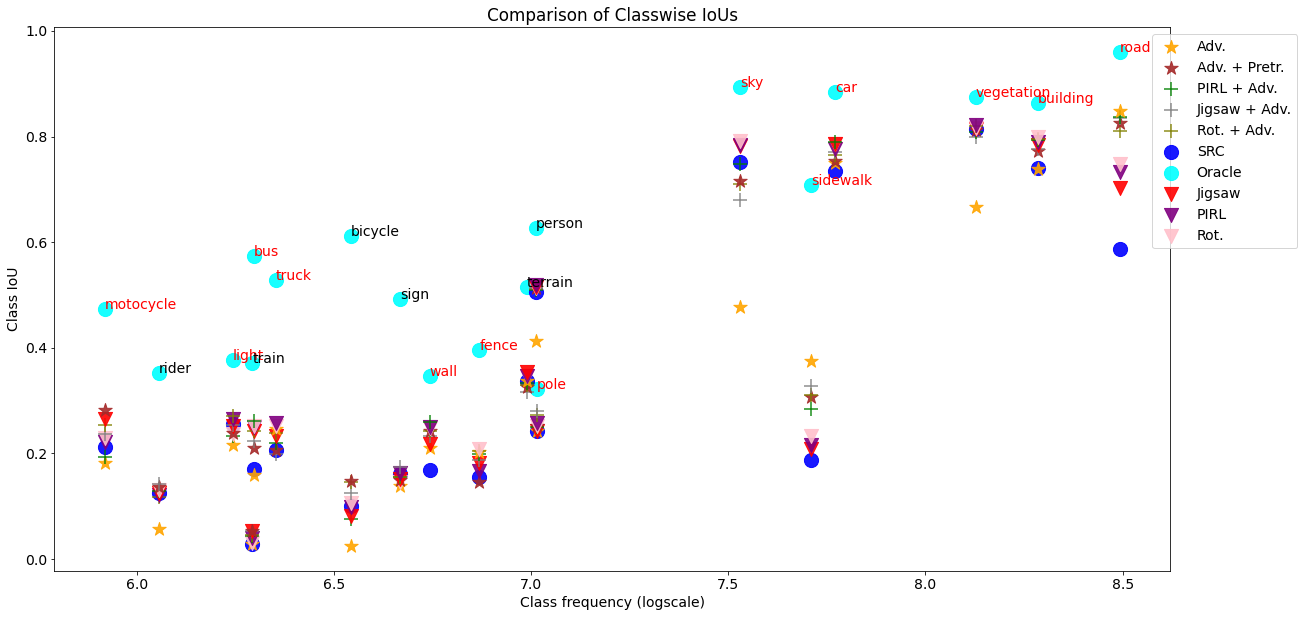

In [31]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['font.size'] = 14

# for model in sorted(models_to_plot, key=lambda x: models_to_plot[x]['marker']):
#     plt.scatter(x=[tar_freq_logscale[c] for c in CLASSES], 
#                 y=[classwise_performance.loc[c, model] for c in CLASSES], s=200, alpha=0.z5,
#                 **models_to_plot[model])
    
for c in CLASSES:
    class_performances = classwise_performance.loc[c, 
        classwise_performance.columns.difference(['segmentation_loss_ablation', 'segmentation_loss_tar_ablation'])]
    src_performance = classwise_performance.loc[c, 'segmentation_loss_ablation']
    tar_performance = classwise_performance.loc[c, 'segmentation_loss_tar_ablation']
    gain = class_performances.max() - src_performance
    gap = tar_performance - src_performance
    class_performances = class_performances.sort_values()
    plt.scatter(x=[tar_freq_logscale[c]], 
                    y=[src_performance], s=200, alpha=0.9,
                    marker='o', c='blue',
                    label='SRC' if c=='road' else None)
    for model in class_performances.index:
        plt.scatter(x=[tar_freq_logscale[c]], 
                    y=[class_performances[model]], s=200, alpha=0.9,
                    marker=models_to_plot[model]['marker'], c=models_to_plot[model]['c'],
                    label=models_to_plot[model]['label'] if c=='road' else None)
    plt.scatter(x=[tar_freq_logscale[c]], 
                y=[tar_performance], s=200, alpha=0.9,
                marker='o', c='cyan',
                label='Oracle' if c=='road' else None)
    plt.text(x=tar_freq_logscale[c], 
             y=tar_performance, 
             s=c,
             c='black' if  float(gain)/float(gap) < 0.1 else 'red')
plt.title(r'Comparison of Classwise IoUs')
handles, labels = plt.gca().get_legend_handles_labels()
legend_elements = dict(zip(labels, handles))
plt.legend([legend_elements[models_to_plot[m]['label']] for m in sorted(models_to_plot, 
                                                                        key=lambda x: models_to_plot[x]['marker'])],
           [models_to_plot[m]['label'] for m in sorted(models_to_plot, 
                                                       key=lambda x: models_to_plot[x]['marker'])], 
           loc='upper right', bbox_to_anchor=(1.12, 1.0))
# plt.xticks(ticks=list(range(6, 10, 2))+[tar_freq_logscale[c] for c in CLASSES],
#            labels=[str(x) for x in range(6, 10, 2)]+CLASSES,
#            rotation='vertical')
plt.xlabel('Class frequency (logscale)')
plt.ylabel('Class IoU')
plt.margins(0.05)
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_classwise_iou.png', bbox_inches = 'tight')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_classwise_iou.pdf', bbox_inches = 'tight')
plt.savefig('/nfs/students/mirlas/vizualizations/figures/ssda_classwise_iou.svg', format='svg', bbox_inches = 'tight')
plt.show()